In [23]:
#simple linear regression

import numpy as np  # Importing NumPy library
import pandas as pd  # Importing Pandas library
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import seaborn as sns  # Imorting Seaborn library
import sklearn 

import os

from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

data = pd.read_csv("cancer_reg.csv", encoding="latin1")

# Changing ranges in Binned Inc feature to be the average of the range
for i in range(len(data['binnedInc'])):
    orgVal  = data['binnedInc'][i]
    valsStr = orgVal[1:-1]
    vals      = valsStr.split(", ")
    newVal    = (float(vals[0]) + float(vals[1])) / 2 
    data['binnedInc'][i] = newVal  

mean_value=data.mean()
data = data.fillna(value=mean_value, inplace=False)

X = data.drop(['TARGET_deathRate', 'Geography', 'PctSomeCol18_24'], axis=1)
y = data['TARGET_deathRate']    
    
# Replacing NaN values with the mean of the column


data 



<ipython-input-23-06a1f4ea193e>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['binnedInc'][i] = newVal


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,93564.75,39.3,...,48.453774,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,49534.00,33.0,...,53.800000,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,49534.00,45.0,...,43.500000,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,43962.70,42.8,...,40.300000,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,49534.00,48.3,...,43.900000,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,46611.30,44.2,...,54.900000,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,49534.00,30.4,...,53.300000,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,52796.00,30.9,...,52.600000,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,49534.00,39.0,...,56.300000,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


<AxesSubplot:>

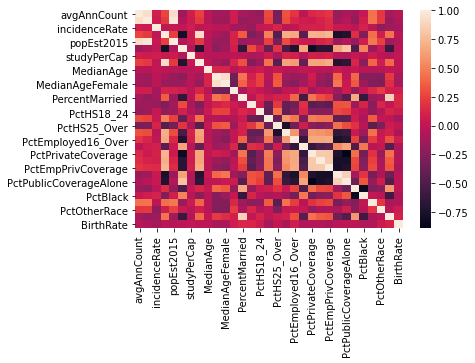

In [24]:
# Covariance plot
sns.heatmap(X.corr(), annot=False)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   float64
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

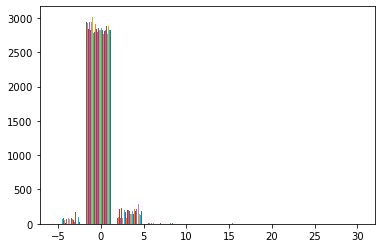

In [26]:
# Normalize data
for column in X.keys():
    X[column] = (X[column] - X[column].mean()) / (X[column].std())
hist = plt.hist(X)

In [27]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.linear_model import LinearRegression

multiple_linear_reg = LinearRegression(fit_intercept=True)
multiple_linear_reg.fit(x_train, y_train)

LinearRegression()

In [36]:
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation


y_pred = multiple_linear_reg.predict(x_test)
y_pred_train = multiple_linear_reg.predict(x_train)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
r2train = r2_score(y_train, y_pred_train)

print("\nMultiple Linear Regression Model............................................\n")
print('RMSE:', rmse)
print("The train score for the MLR model is {}".format(r2train))
print("The test score for the MLR model is {}".format(r2))


Multiple Linear Regression Model............................................

RMSE: 20.349634159394437
The train score for the MLR model is 0.5281436024320966
The test score for the MLR model is 0.49390772884312306


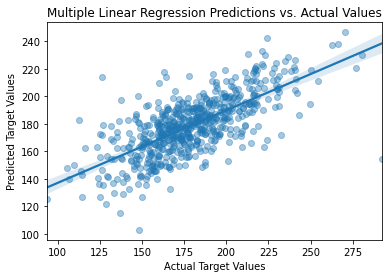

In [30]:
# Scatter plot 
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Multiple Linear Regression Predictions vs. Actual Values')
plt.show()

In [31]:
y.shape

(3047,)

In [32]:
y_pred_MLR_test.shape

NameError: name 'y_pred_MLR_test' is not defined

In [ ]:
print(y)

In [ ]:
print(y_pred_MLR_test)